This notebook contains the following:

01- Setting up notebook.
02- Data consistency checks and wrangling.
03- Initial EDA.
04- Data questions.


01-Setting up notebook.

In [1]:
# Importing Analitycal and Visual libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from datetime import datetime 
import folium
import json
import plotly
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
#Establishing path to import dataset.
path =  r'C:\Users\Paola\Desktop\Shaul\Data\Data Courses\Speedy Mentors'
print(path)

C:\Users\Paola\Desktop\Shaul\Data\Data Courses\Speedy Mentors


In [3]:
#Importing dataset.
df = pd.read_csv(os.path.join(path, "Task 19 - KibanaFlights", "flights.csv"), index_col= False)
#Dataset imported succesfully.

02 - Quality and consistency checks. Data wrangling.`

In [4]:
#Getting the DF dimensions.
df.shape

(5554, 26)

In [5]:
#Looking for missing values.
df.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime               194
CRSDepTime              0
ArrTime               197
CRSArrTime              0
ActualElapsedTime     208
CRSElapsedTime          0
AirTime               208
ArrDelay              208
DepDelay              194
Origin                  0
Dest                    0
Distance                0
TaxiIn                197
TaxiOut               195
Cancelled               0
CancellationCode     5358
Diverted                0
CarrierDelay         4449
WeatherDelay         4449
NASDelay             4449
SecurityDelay        4449
LateAircraftDelay    4449
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5554 entries, 0 to 5553
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5554 non-null   int64  
 1   Month              5554 non-null   int64  
 2   DayofMonth         5554 non-null   int64  
 3   DayOfWeek          5554 non-null   int64  
 4   DepTime            5360 non-null   float64
 5   CRSDepTime         5554 non-null   int64  
 6   ArrTime            5357 non-null   float64
 7   CRSArrTime         5554 non-null   int64  
 8   ActualElapsedTime  5346 non-null   float64
 9   CRSElapsedTime     5554 non-null   int64  
 10  AirTime            5346 non-null   float64
 11  ArrDelay           5346 non-null   float64
 12  DepDelay           5360 non-null   float64
 13  Origin             5554 non-null   object 
 14  Dest               5554 non-null   object 
 15  Distance           5554 non-null   int64  
 16  TaxiIn             5357 

These are the columns with missing values:

1) DepTime               194
2) ArrTime               197
3) ActualElapsedTime     208
4) AirTime               208
5) ArrDelay              208
6) DepDelay              194
8) TaxiIn                197
9) TaxiOut               195

NOTE 1:These missing values are around 3% of the column's data. While statistically they could have been 'ignored', I prefer to use imputatation to have a 'smoother' analysis. For that purpose, I am going to use either the mean or the median, depemding on the difference between them and how skewed the data is.
NOTE 2: The missing values of the 'CancellationCode' column belong to those flights which were not cancelled (hence, no cancelation code). To better visualise the data, I am going to replace the missing values with 'No cancellation'.

In [7]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,5554.0,5554.000000,5554.000000,5554.000000,5360.000000,5554.00000,5357.000000,5554.000000,5346.000000,5554.000000,...,5554.000000,5357.000000,5359.000000,5554.000000,5554.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000
mean,2020.0,4.485956,15.829672,4.167267,1318.544963,1322.57220,1496.107710,1505.514404,229.489525,236.622434,...,1558.347677,9.618443,18.874977,0.035290,0.002161,26.112217,3.857014,13.828959,0.240724,21.638914
std,0.0,3.050727,8.993353,2.014785,497.082368,480.88507,554.127042,541.062588,105.281123,106.323087,...,870.009918,7.794218,8.670616,0.184528,0.046436,84.541635,37.977961,20.669910,3.543463,49.931120
min,2020.0,1.000000,1.000000,1.000000,1.000000,30.00000,1.000000,10.000000,49.000000,62.000000,...,175.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,3.000000,8.000000,2.000000,859.000000,900.00000,1136.000000,1141.000000,150.000000,156.000000,...,944.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.0,3.000000,16.000000,4.000000,1315.000000,1315.00000,1544.000000,1554.000000,216.000000,225.000000,...,1438.000000,8.000000,17.000000,0.000000,0.000000,2.000000,0.000000,5.000000,0.000000,0.000000
75%,2020.0,5.000000,24.000000,6.000000,1726.000000,1715.00000,1952.000000,1959.000000,319.000000,323.000000,...,2475.000000,11.000000,22.000000,0.000000,0.000000,21.000000,0.000000,21.000000,0.000000,22.000000
max,2020.0,12.000000,31.000000,7.000000,2359.000000,2359.00000,2400.000000,2359.000000,576.000000,524.000000,...,3784.000000,101.000000,121.000000,1.000000,1.000000,1272.000000,1043.000000,217.000000,96.000000,468.000000


In [8]:
#Imputation Coding
df['DepTime'].fillna((df['DepTime'].mean()), inplace=True)
df['ArrTime'].fillna((df['ArrTime'].mean()), inplace=True)
df['ActualElapsedTime'].fillna((df['ActualElapsedTime'].median()), inplace=True)
df['AirTime'].fillna((df['AirTime'].mean()), inplace=True)
df['ArrDelay'].fillna((df['ArrDelay'].mean()), inplace=True)
df['DepDelay'].fillna((df['DepDelay'].mean()), inplace=True)
df['TaxiIn'].fillna((df['TaxiIn'].median()), inplace=True)
df['TaxiOut'].fillna((df['TaxiOut'].median()), inplace=True)

In [9]:
#Replacing 'NaN' with '0' for 'No Cancelation'
df['CancellationCode'].fillna('NoCancel', inplace = True)

In [10]:
#These columns are not relevant to this particular analysis du to so many missing values (more then 80%).
# They will be removed from this DF.
#CarrierDelay         4449
#WeatherDelay         4449
#NASDelay             4449
#SecurityDelay        4449
#LateAircraftDelay    4449

del df['CarrierDelay']
del df['WeatherDelay']
del df['NASDelay']
del df['SecurityDelay']
del df['LateAircraftDelay']

In [11]:
df.isnull().sum()
#Missing values have been corrected.

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
dtype: int64

In [12]:
# Looking for duplicates
dups = df[df.duplicated()]
dups
#No duplicates in this dataset

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted


In [13]:
# Checking df for mixed data in the dataset.
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
#No mixed data column found = 'CancellationCode'.

In [14]:
df['CancellationCode'].value_counts(dropna=False)

NoCancel    5358
B            172
A             21
C              3
Name: CancellationCode, dtype: int64

In [15]:
# Exporting 'DF' to csv
df.to_csv(os.path.join(path, 'Task 19 - KibanaFlights', 'Task19-KibanaFlights_updated.csv'))

03 - Getting initial EDA

In [16]:
df['Year'].value_counts(dropna=False)
#All data belong to year 2020.

2020    5554
Name: Year, dtype: int64

In [17]:
df['Month'].value_counts(dropna=False)

3     1512
5     1204
1     1081
11     522
7      374
2      263
4      166
8      159
10     113
6       79
12      41
9       40
Name: Month, dtype: int64

In [1]:
print('Jan = '+str(1081/5554))
print('Feb = '+str(263/5554))
print('Mar = '+str(1512/5554))
print('Apr = '+str(166/5554))
print('May = '+str(1024/5554))
print('Jun = '+str(79/5554))
print('Jul = '+str(374/5554))
print('Aug = '+str(159/5554))
print('Sep = '+str(40/5554))
print('Oct = '+str(113/5554))
print('Nov = '+str(522/5554))
print('Dec = '+str(41/5554))

Jan = 0.19463449765934462
Feb = 0.0473532589124955
Mar = 0.2722362261433201
Apr = 0.02988836874324811
May = 0.18437162405473534
Jun = 0.014223982715160245
Jul = 0.06733885487936622
Aug = 0.02862801584443644
Sep = 0.007202016564638099
Oct = 0.02034569679510263
Nov = 0.09398631616852719
Dec = 0.007382066978754051


<Axes: >

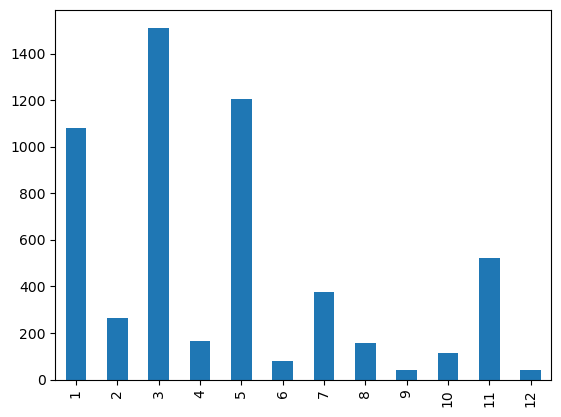

In [18]:
order = [1,2,3,4,5,6,7,8,9,10,11,12]
df['Month'].value_counts(dropna=False).loc[order].plot(kind='bar')

NOTE: it is clear that January, MArch, May are favourites. Followed by November.
While it is not surprising to find that spring months are busy with flights, it is surprising that there is almost no actuvuty in the sammer months or the december holiday season.

In [19]:
df['DayofMonth'].value_counts(dropna=False)

3     203
2     192
4     191
7     186
21    185
28    184
12    183
1     183
14    183
10    182
18    182
19    182
24    181
31    181
26    181
25    181
6     181
11    181
8     181
22    180
20    180
27    179
29    179
15    178
13    178
5     178
17    176
23    157
30    156
16    155
9     155
Name: DayofMonth, dtype: int64

<Axes: >

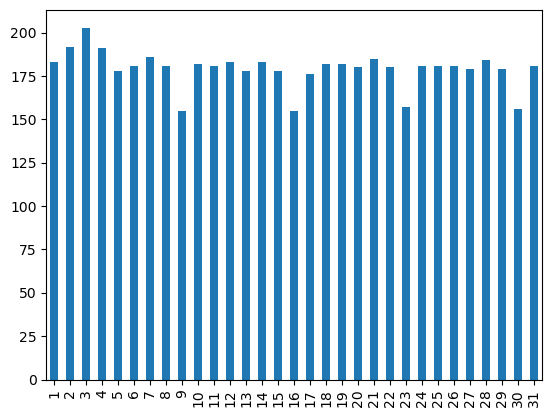

In [20]:
order1 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
df['DayofMonth'].value_counts(dropna=False).loc[order1].plot(kind='bar')

Note: excluding minor differences, it seems there is no favourite day of the month to fly.

In [21]:
df['DayOfWeek'].value_counts(dropna=False)

7    923
5    901
6    815
4    738
1    735
2    724
3    718
Name: DayOfWeek, dtype: int64

<Axes: >

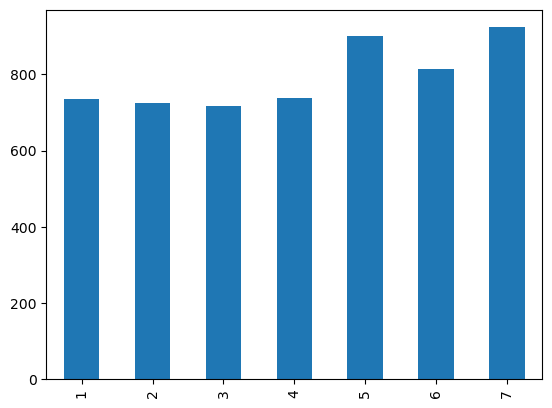

In [22]:
order2 = [1,2,3,4,5,6,7]
df['DayOfWeek'].value_counts(dropna=False).loc[order2].plot(kind='bar')

NOTE: assuming the week starts on Monday (with 1 as a value), there is a small preference to fly towards the weekend.

In [23]:
# counting unique values for the skill groups.
n = len(pd.unique(df['Origin']))
 
print("The number of Departure Airports is:", 
      n)

The number of Departure Airports is: 40


In [24]:
df['Origin'].value_counts(dropna=False)

DFW    891
LAX    782
JFK    733
MIA    414
ORD    397
SFO    379
MCO    209
LAS    198
BOS    153
DCA    151
HNL     94
SEA     94
OGG     79
SAN     66
TPA     62
SNA     62
ELP     62
AUS     60
OKC     59
DEN     58
LGA     58
DTW     58
SJC     49
RIC     35
KOA     35
TUS     32
PHX     32
SLC     31
PHL     31
CLT     31
STL     29
BNA     28
RDU     26
ATL     25
LBB     25
STT     12
JAC      6
IAH      4
SMF      3
FLL      1
Name: Origin, dtype: int64

<Axes: >

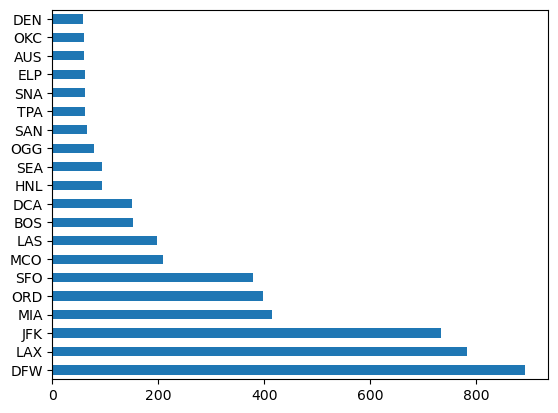

In [25]:
df['Origin'].value_counts(dropna=False).head(20).plot(kind='barh')

NOTE: the 3 busiest airports are: Dallas, Los Angeles and New York. They are followed by Miami, Chicago and San Francisco (in this order).

In [26]:
# counting unique values for the skill groups.
n = len(pd.unique(df['Dest']))
 
print("The number of Destinations available to fly is:", 
      n, ". There are 3 more destinations compared to 40 Origin airports.")

The number of Destinations available to fly is: 43 . There are 3 more destinations compared to 40 Origin airports.


In [27]:
df['Dest'].value_counts(dropna=False)

DFW    1053
LAX     822
JFK     684
MIA     458
ORD     409
SFO     399
BOS     155
DCA     141
LAS     135
MCO     124
SJC      97
SEA      96
LGA      85
STL      79
OGG      75
SAN      65
HNL      63
ELP      62
TPA      62
SLC      47
AUS      45
KOA      35
PDX      35
TUS      31
RDU      31
DTW      31
PHL      31
DEN      31
IAH      31
ONT      30
CLT      30
SAT      27
BNA      18
EWR      14
IAD       7
SMF       4
MCI       4
RIC       3
PHX       1
SNA       1
FLL       1
TUL       1
STT       1
Name: Dest, dtype: int64

<Axes: >

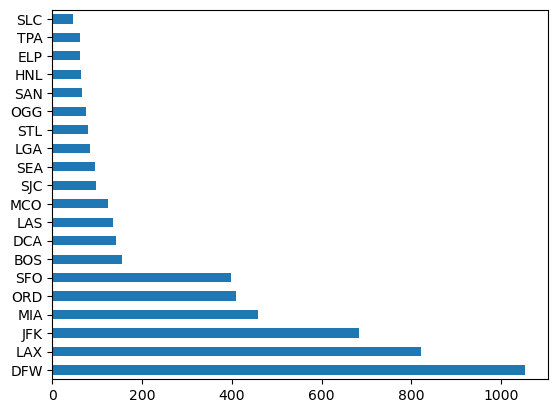

In [28]:
df['Dest'].value_counts(dropna=False).head(20).plot(kind='barh')

NOTE: it is interesting to note that the exactly same trend for 'Origins' (i.e. busiest airports) are also present for 'Destinations'. This refers mainly to the top 6 on this list.

In [81]:
df['Cancelled'].value_counts(dropna=False)

0    5358
1     196
Name: Cancelled, dtype: int64

In [82]:
print('No cancellation = ' + str(5358/5554))
print('Cancellation = ' + str(196/5554))

No cancellation = 0.9647101188332733
Cancellation = 0.03528988116672668


<Axes: ylabel='Cancelled'>

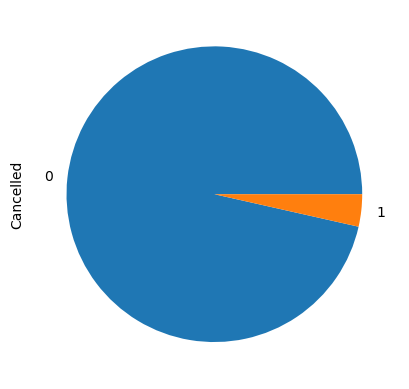

In [83]:
df['Cancelled'].value_counts(dropna=False).plot(kind='pie')

In [84]:
df['CancellationCode'].value_counts(dropna=False)

NoCancel    5358
B            172
A             21
C              3
Name: CancellationCode, dtype: int64

<Axes: >

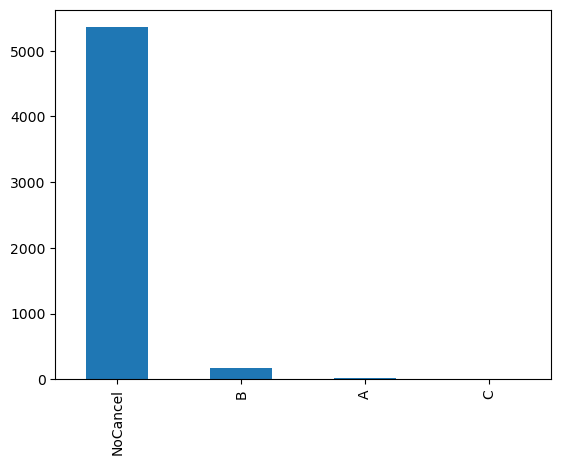

In [85]:
df['CancellationCode'].value_counts(dropna=False).plot(kind='bar')

In [86]:
df['Diverted'].value_counts(dropna=False)

0    5542
1      12
Name: Diverted, dtype: int64

In [87]:
print('Not diverted = ' + str(5542/5554))
print('Diverted = ' + str(12/5554))
print('Virtually no flights diverted. Divertion was almost 0%')

Not diverted = 0.9978393950306086
Diverted = 0.0021606049693914295
Virtually no flights diverted. Divertion was almost 0%


<Axes: ylabel='Diverted'>

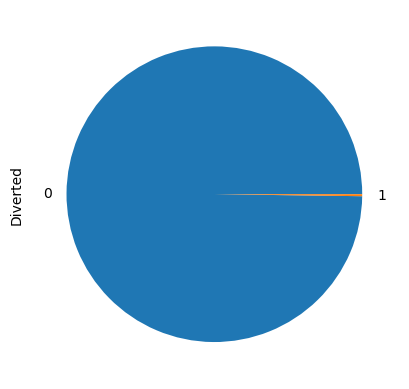

In [88]:
df['Diverted'].value_counts(dropna=False).plot(kind='pie')

04 - DataQuestions:

Display the following data:

a. Total count of flight records
b. Total cancelled flights per month
c. Top 3 Destinations for the top 4 months = Jan, Mar, May and Nov.
d. Top 3 busiest airports for flight departures in the same top 4 months.
e. Top 3 busiest airports for flight departures on the 1st Sunday of MArch 2020.
f. Top 3 destinations on the second saturday of May 2020
g. Analyze flights for delay in departure = % and trend per day of week.
i. Analyse flights for delay in arrival = % and trend per day of week.


Total count of Flight Records

In [89]:
#a. Total count of flight records

df['DepTime'].count()

5554

Total cancelled flights per month.

In [90]:
can = df[df['Cancelled'] == 1]

In [91]:
can.groupby(['Month'])['Cancelled'].count()

Month
1     32
2      3
3     70
4      5
5     44
6      4
7      7
8      6
10     5
11    18
12     2
Name: Cancelled, dtype: int64

<Axes: ylabel='Month'>

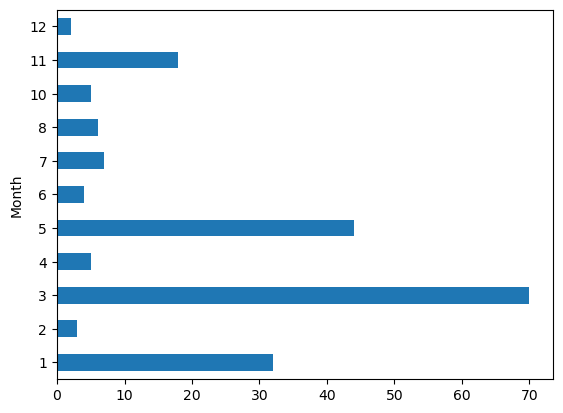

In [92]:
can.groupby(['Month'])['Cancelled'].count().plot(kind='barh')

NOTE: it is interesting to observe that - for the top 4 months - the trend of cancelled flights is exactly the same for the count of flights. The busiest months had also the highest number of cancellations, in the exact same order.

Top 3 Destinations in January, MArch, May and November

In [93]:
#Figures for January
jan = df[df['Month'] == 1]

In [94]:
jan.groupby(['Dest'])['Dest'].count().nlargest(3)

Dest
DFW    201
JFK    139
MIA    130
Name: Dest, dtype: int64

<Axes: xlabel='Dest'>

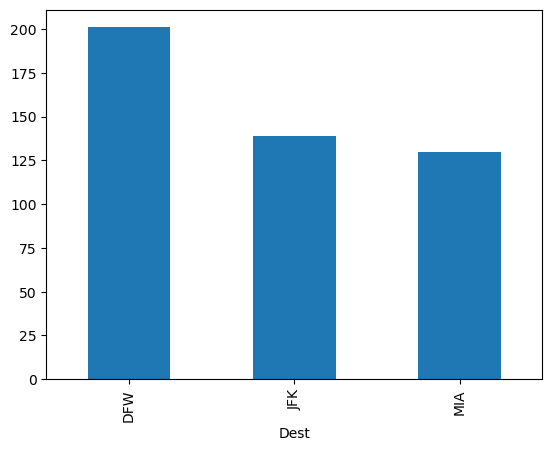

In [95]:
jan.groupby(['Dest'])['Dest'].count().nlargest(3).plot(kind='bar')

In [96]:
#Figures for MArch
mar = df[df['Month'] == 3]

In [97]:
mar.groupby(['Dest'])['Dest'].count().nlargest(3)

Dest
JFK    365
LAX    278
DFW    218
Name: Dest, dtype: int64

<Axes: xlabel='Dest'>

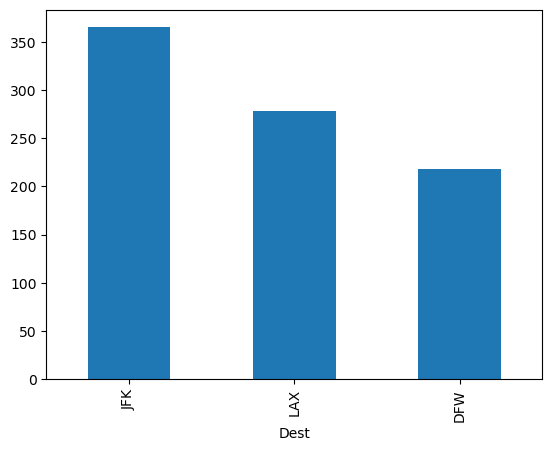

In [98]:
mar.groupby(['Dest'])['Dest'].count().nlargest(3).plot(kind='bar')

In [99]:
#Figures for May
may = df[df['Month'] == 5]

In [100]:
may.groupby(['Dest'])['Dest'].count().nlargest(3)

Dest
DFW    262
LAX    239
ORD    115
Name: Dest, dtype: int64

<Axes: xlabel='Dest'>

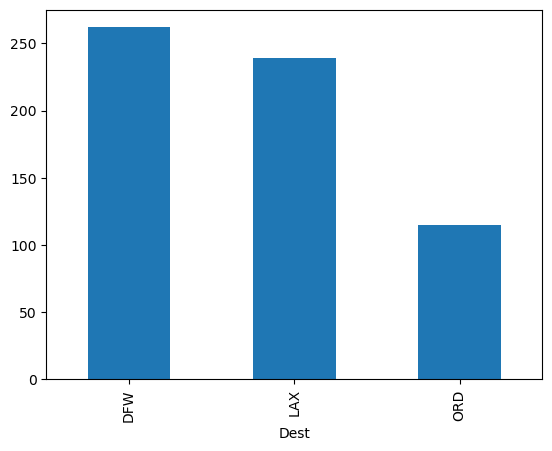

In [101]:
may.groupby(['Dest'])['Dest'].count().nlargest(3).plot(kind='bar')

In [102]:
#Figures for November
nov = df[df['Month'] == 11]

In [103]:
nov.groupby(['Dest'])['Dest'].count().nlargest(3)

Dest
DFW    112
ORD     92
JFK     66
Name: Dest, dtype: int64

<Axes: xlabel='Dest'>

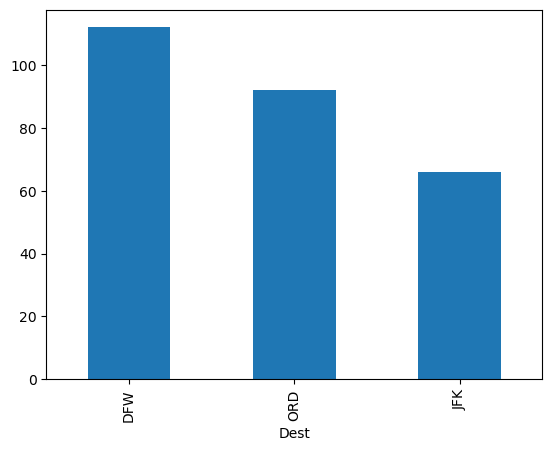

In [104]:
nov.groupby(['Dest'])['Dest'].count().nlargest(3).plot(kind='bar')

Top 3 busiest airports for flight departures in the months of January, March, May and November

In [105]:
#Figures for January
jan.groupby(['Origin'])['Origin'].count().nlargest(3)

Origin
MIA    155
DFW    147
JFK    131
Name: Origin, dtype: int64

<Axes: xlabel='Origin'>

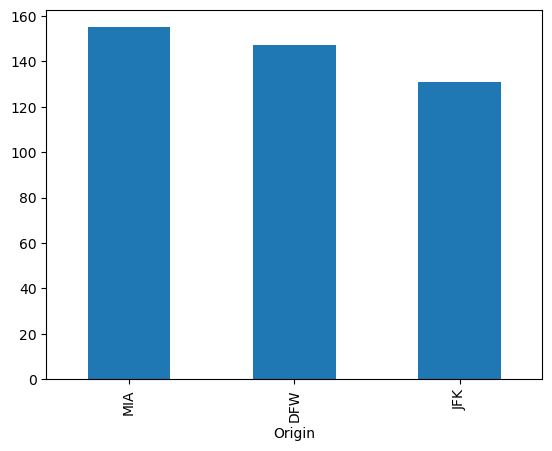

In [106]:
jan.groupby(['Origin'])['Origin'].count().nlargest(3).plot(kind='bar')

In [107]:
#Figures for March
mar.groupby(['Origin'])['Origin'].count().nlargest(3)

Origin
LAX    329
JFK    279
SFO    206
Name: Origin, dtype: int64

<Axes: xlabel='Origin'>

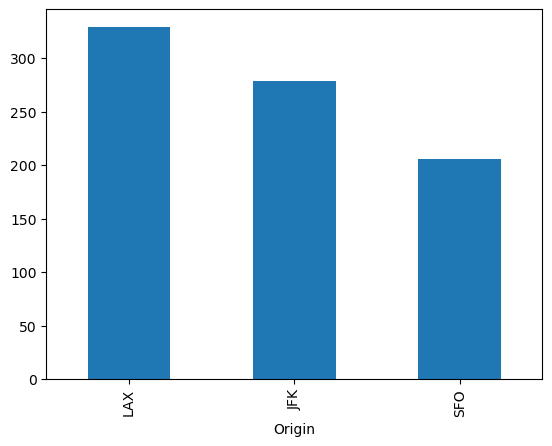

In [108]:
mar.groupby(['Origin'])['Origin'].count().nlargest(3).plot(kind='bar')

In [109]:
#Figures for May
may.groupby(['Origin'])['Origin'].count().nlargest(3)

Origin
DFW    220
JFK    140
MIA     92
Name: Origin, dtype: int64

<Axes: xlabel='Origin'>

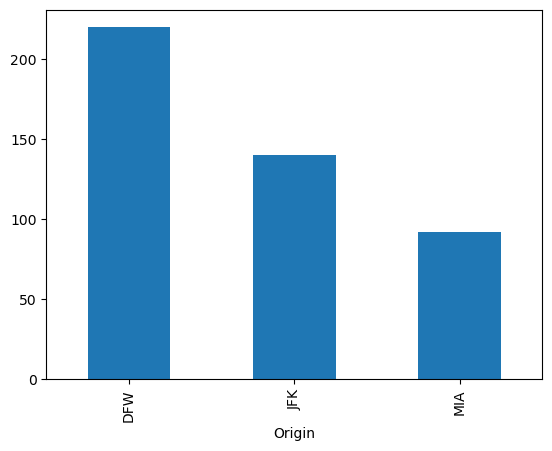

In [110]:
may.groupby(['Origin'])['Origin'].count().nlargest(3).plot(kind='bar')

In [111]:
#Figures for November
nov.groupby(['Origin'])['Origin'].count().nlargest(3)

Origin
DFW    107
ORD    107
JFK     68
Name: Origin, dtype: int64

<Axes: xlabel='Origin'>

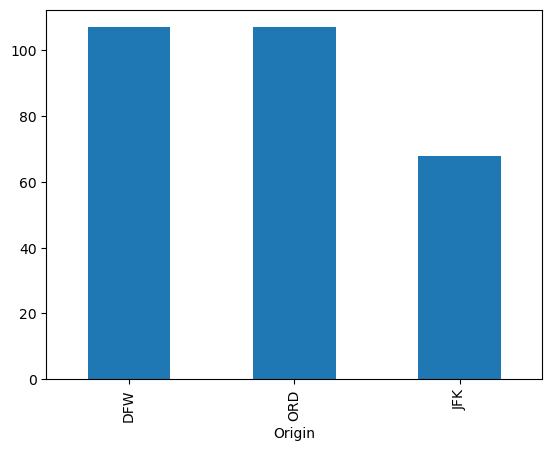

In [112]:
nov.groupby(['Origin'])['Origin'].count().nlargest(3).plot(kind='bar')

Top 3 busiest airports on the 1st Sunday of March 2020. It happens to be March the 1st.

In [113]:
marsun = mar[mar['DayofMonth'] == 1]

In [114]:
#Figures for January
marsun.groupby(['Origin'])['Origin'].count().nlargest(3)

Origin
LAX    10
JFK     7
DFW     6
Name: Origin, dtype: int64

<Axes: ylabel='Origin'>

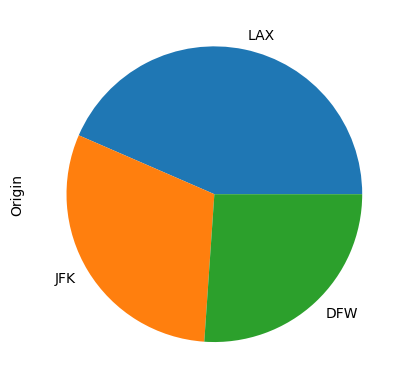

In [115]:
marsun.groupby(['Origin'])['Origin'].count().nlargest(3).plot(kind='pie')

Top 3 destinations on the 2nd Saturday of May 2020. It happens to be the 9th of May.

In [116]:
maysun = may[may['DayofMonth'] == 9]

In [117]:
maysun.groupby(['Dest'])['Dest'].count().nlargest(3)

Dest
DFW    9
LAX    6
ORD    3
Name: Dest, dtype: int64

<Axes: ylabel='Dest'>

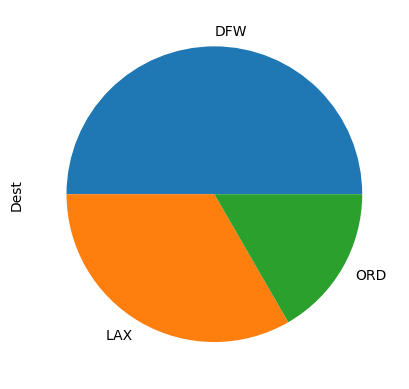

In [118]:
maysun.groupby(['Dest'])['Dest'].count().nlargest(3).plot(kind='pie')

Trends for delay in departure

In [119]:
df.loc[df['DepDelay'] <= 0, 'DepartureDelay'] = 'No'

In [120]:
df.loc[df['DepDelay'] > 0, 'DepartureDelay'] = 'Yes'

In [121]:
df['DepartureDelay'].value_counts(dropna=False)

No     3423
Yes    2131
Name: DepartureDelay, dtype: int64

In [122]:
print('% of delay in departure is ' +str(2131/5554))

% of delay in departure is 0.3836874324810947


<Axes: >

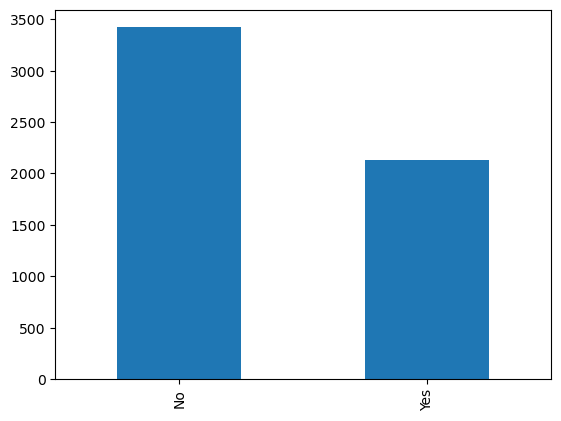

In [123]:
df['DepartureDelay'].value_counts(dropna=False).plot(kind='bar')

Trends for delay in Arrival

In [124]:
df.loc[df['ArrDelay'] > 0, 'ArrivalDelay'] = 'Yes'

In [125]:
df.loc[df['ArrDelay'] <= 0, 'ArrivalDelay'] = 'No'

In [126]:
df['ArrivalDelay'].value_counts(dropna=False)

No     3358
Yes    2196
Name: ArrivalDelay, dtype: int64

<Axes: >

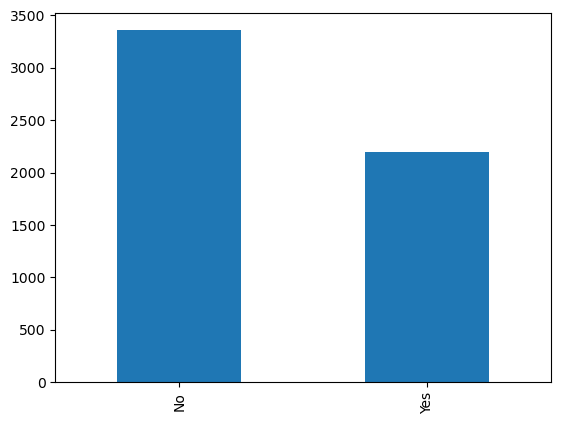

In [127]:
df['ArrivalDelay'].value_counts(dropna=False).plot(kind='bar')

In [128]:
print('% of delay in arrivals is ' +str(2196/5554))

% of delay in arrivals is 0.39539070939863163


In [129]:
# Exporting 'DF' to csv after creating these variables
df.to_csv(os.path.join(path, 'Task 19 - KibanaFlights', 'Task19-KibanaFlights_updated.csv'))

In [130]:
delaydep = df[df['DepartureDelay'] == 'Yes']

In [131]:
#Getting trend of deay in departure per day of week.
delaydep.groupby(['DayOfWeek'])['DepartureDelay'].count()

DayOfWeek
1    322
2    242
3    229
4    251
5    341
6    336
7    410
Name: DepartureDelay, dtype: int64

In [132]:
print('Mon='+str(322/2131))
print('Tue='+str(242/2131))
print('Wed='+str(229/2131))
print('Thu='+str(251/2131))
print('Fri='+str(341/2131))
print('Sat='+str(336/2131))
print('Sun='+str(410/2131))

Mon=0.15110276865321445
Tue=0.11356170811825433
Wed=0.10746128578132333
Thu=0.11778507742843736
Fri=0.16001877053026747
Sat=0.15767245424683246
Sun=0.19239793524167056


<Axes: ylabel='DayOfWeek'>

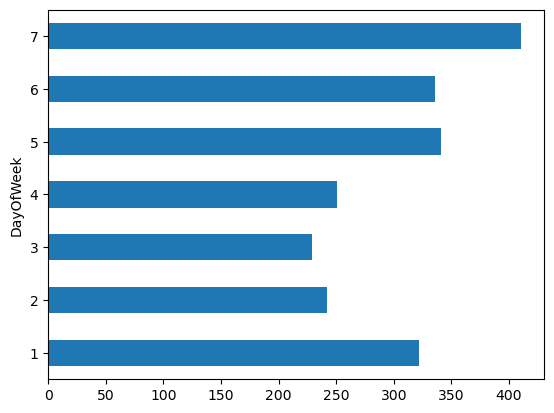

In [133]:
delaydep.groupby(['DayOfWeek'])['DepartureDelay'].count().plot(kind='barh')

In [134]:
#Getting trend of deay in departure per day of week.
arrdep = df[df['ArrivalDelay'] == 'Yes']

In [135]:
arrdep.groupby(['DayOfWeek'])['ArrivalDelay'].count()

DayOfWeek
1    317
2    267
3    258
4    273
5    357
6    322
7    402
Name: ArrivalDelay, dtype: int64

<Axes: ylabel='DayOfWeek'>

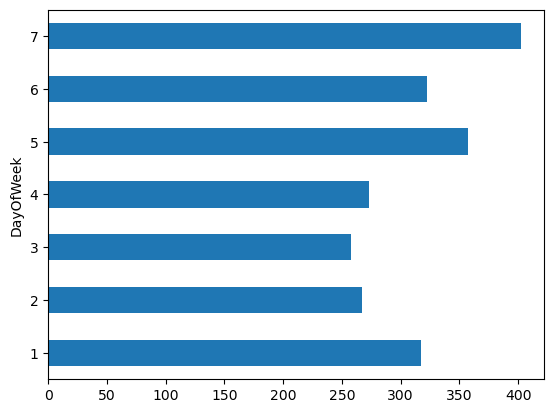

In [136]:
arrdep.groupby(['DayOfWeek'])['ArrivalDelay'].count().plot(kind='barh')

In [137]:
print('Mon='+str(317/2196))
print('Tue='+str(267/2196))
print('Wed='+str(258/2196))
print('Thu='+str(273/2196))
print('Fri='+str(357/2196))
print('Sat='+str(322/2196))
print('Sun='+str(402/2196))

Mon=0.14435336976320584
Tue=0.12158469945355191
Wed=0.11748633879781421
Thu=0.12431693989071038
Fri=0.16256830601092895
Sat=0.14663023679417123
Sun=0.1830601092896175


Converting Jupiter Notebook to html format

In [2]:
!jupyter nbconvert --to html Task19-KibanaFlights.ipynb

[NbConvertApp] Converting notebook Task19-KibanaFlights.ipynb to html
[NbConvertApp] Writing 1058450 bytes to Task19-KibanaFlights.html
